<a href="https://colab.research.google.com/github/ayanoglu/OrtalamaTahmin/blob/SVM/REDGPAmainNEWDATA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from google.colab import files
import io
uploaded = files.upload()

Saving EE Students Spring 2021.csv to EE Students Spring 2021.csv
Saving Engineering Freshmen Fall 21 - January 31 22.csv to Engineering Freshmen Fall 21 - January 31 22.csv
Saving Engineering Freshmen Spring 2021.csv to Engineering Freshmen Spring 2021.csv
Saving Psychology Subject Pool May 2021 - Jan 31 2022.csv to Psychology Subject Pool May 2021 - Jan 31 2022.csv
Saving Psychology Subject Pool Spring 2021.csv to Psychology Subject Pool Spring 2021.csv


In [2]:
DF_EEStudentsSpring2021 = pd.read_csv(io.BytesIO(uploaded['EE Students Spring 2021.csv']), header=None, skip_blank_lines=True)
DF_EngFreshmenFall2021 = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Fall 21 - January 31 22.csv']), header=None, skip_blank_lines=True)
DF_EngFreshmenSpring2021 = pd.read_csv(io.BytesIO(uploaded['Engineering Freshmen Spring 2021.csv']), header=None, skip_blank_lines=True)
DF_PsychologyMay2021 = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool May 2021 - Jan 31 2022.csv']), header=None, skip_blank_lines=True)
DF_PsychologySpring2021 = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool Spring 2021.csv']), header=None, skip_blank_lines=True)

In [3]:
DF1EE = DF_EEStudentsSpring2021.iloc[3:,18:80]
DF1ENGF = DF_EngFreshmenFall2021.iloc[3:,18:80]
DF1ENGS = DF_EngFreshmenSpring2021.iloc[3:,18:80]
DF1PM = DF_PsychologyMay2021.iloc[3:,18:80]
DF1PS = DF_PsychologySpring2021.iloc[3:,18:80]
# Some of the datasets, 3 is actually 2, and 7 is actually 3, for the questions 51-54.

In [4]:
# ENG FALL DATASET HAS THE PROBLEM.
# do i = 51 to 54;	1) if x(i) = 3 then x(i) = 2; 	2) if x(i) = 7 then x(i) = 3; end; 

DF1ENGF.iloc[:,50] = np.where(DF1ENGF.iloc[:,50]== 3, 2, DF1ENGF.iloc[:,50])
DF1ENGF.iloc[:,51] = np.where(DF1ENGF.iloc[:,51]== 3, 2, DF1ENGF.iloc[:,51])
DF1ENGF.iloc[:,52] = np.where(DF1ENGF.iloc[:,52]== 3, 2, DF1ENGF.iloc[:,52])
DF1ENGF.iloc[:,53] = np.where(DF1ENGF.iloc[:,53]== 3, 2, DF1ENGF.iloc[:,53])

DF1ENGF.iloc[:,50] = np.where(DF1ENGF.iloc[:,50]== 7, 3, DF1ENGF.iloc[:,50])
DF1ENGF.iloc[:,51] = np.where(DF1ENGF.iloc[:,51]== 7, 3, DF1ENGF.iloc[:,51])
DF1ENGF.iloc[:,52] = np.where(DF1ENGF.iloc[:,52]== 7, 3, DF1ENGF.iloc[:,52])
DF1ENGF.iloc[:,53] = np.where(DF1ENGF.iloc[:,53]== 7, 3, DF1ENGF.iloc[:,53])


In [5]:
# ENG SPRING DATASET HAS THE PROBLEM.
# do i = 51 to 54;	1) if x(i) = 3 then x(i) = 2; 	2) if x(i) = 7 then x(i) = 3; end; 

DF1ENGS.iloc[:,50] = np.where(DF1ENGS.iloc[:,50]== 3, 2, DF1ENGS.iloc[:,50])
DF1ENGS.iloc[:,51] = np.where(DF1ENGS.iloc[:,51]== 3, 2, DF1ENGS.iloc[:,51])
DF1ENGS.iloc[:,52] = np.where(DF1ENGS.iloc[:,52]== 3, 2, DF1ENGS.iloc[:,52])
DF1ENGS.iloc[:,53] = np.where(DF1ENGS.iloc[:,53]== 3, 2, DF1ENGS.iloc[:,53])

DF1ENGS.iloc[:,50] = np.where(DF1ENGS.iloc[:,50]== 7, 3, DF1ENGS.iloc[:,50])
DF1ENGS.iloc[:,51] = np.where(DF1ENGS.iloc[:,51]== 7, 3, DF1ENGS.iloc[:,51])
DF1ENGS.iloc[:,52] = np.where(DF1ENGS.iloc[:,52]== 7, 3, DF1ENGS.iloc[:,52])
DF1ENGS.iloc[:,53] = np.where(DF1ENGS.iloc[:,53]== 7, 3, DF1ENGS.iloc[:,53])

In [6]:
DF1 = pd.concat([DF1EE, DF1ENGF, DF1ENGS, DF1PM, DF1PS], axis = 0)

In [7]:
DF1.shape

(3855, 62)

In [8]:
DF1.isnull().any(axis=1).sum() #number of columns with NaNs
DF2 = DF1.dropna(axis=0) # Drop rows with NaNs
DF2.isnull().any(axis=1).sum() #number of columns with NaNs
DF3 = DF2.apply(pd.to_numeric, errors='coerce') # change object type to numeric, errors will be NaNs
DF3.isnull().any(axis=1).sum()
DF4 = DF3.dropna(axis=0) # Drop rows with NaNs
DF4.isnull().any(axis=1).sum()
DF4.columns = range(DF4.columns.size) # re index column numbers
(DF4.iloc[:,-1] == 0).sum() #number of rows on the last column that are equal to 0
DF4.iloc[:,-1].min() #min of last column
DF4.iloc[:,-1].idxmin() #idx of the min of last column
DF4 = DF4[(DF4.iloc[:,-1] > 0)] #drop the GPA values that are smaller than 0
DF4 = DF4.reset_index() # reset row index with a new index column
DF4 = DF4.drop(labels='index', axis=1) #drop the old index column

In [9]:
DF4.shape

(2592, 62)

START MODYFYING SOME COLUMNS AND ADDING THE ADDITIONAL FUNCTIONS

In [10]:
#If x(33) = 4 then x(33) = 2; 
DF4.iloc[:,32] = np.where(DF4.iloc[:,32]== 4, 2, DF4.iloc[:,32])

#If gpa > 4 then gpa = 4;
DF4.iloc[:,-1] = np.where(DF4.iloc[:,-1] > 4, 4, DF4.iloc[:,-1]) #GPA = DF4.iloc[:,-1]

# do i = 9, 11, 18, 22, 28, 29; x(i) = 8-x(i);
# do i = 31, 33, 37, 41, 43, 45, 47, 50; *action-state; x(i) = 3 - x(i);
DF4.iloc[:,8] = 8 - DF4.iloc[:,8]
DF4.iloc[:,10] = 8 - DF4.iloc[:,10]
DF4.iloc[:,17] = 8 - DF4.iloc[:,17]
DF4.iloc[:,21] = 8 - DF4.iloc[:,21]
DF4.iloc[:,27] = 8 - DF4.iloc[:,27]
DF4.iloc[:,28] = 8 - DF4.iloc[:,28]

DF4.iloc[:,30] = 3 - DF4.iloc[:,30]
DF4.iloc[:,32] = 3 - DF4.iloc[:,32]
DF4.iloc[:,36] = 3 - DF4.iloc[:,36]
DF4.iloc[:,40] = 3 - DF4.iloc[:,40]
DF4.iloc[:,42] = 3 - DF4.iloc[:,42]
DF4.iloc[:,44] = 3 - DF4.iloc[:,44]
DF4.iloc[:,46] = 3 - DF4.iloc[:,46]
DF4.iloc[:,49] = 3 - DF4.iloc[:,49]

#do i = 1 to 7; efficacy = efficacy + x(i); end;
DF4['efficacy']= DF4.iloc[:, 0:7].sum(axis=1)

#do i = 8 to 29; habits = habits + x(i); end;
DF4['habbits']= DF4.iloc[:, 7:29].sum(axis=1)

#do i = 30 to 37; preocc = preocc + x(i); end;
DF4['preocc']= DF4.iloc[:, 29:37].sum(axis=1)

#do i = 38 to 45; hesitat = hesitat + x(i); end;
DF4['hesitat']= DF4.iloc[:, 37:45].sum(axis=1)

#do i = 46 to 50; volatil = volatil + x(i);
DF4['volatil']= DF4.iloc[:, 45:50].sum(axis=1)

#do i = 51 to 54; engagecurric = engagecurric + x(i); end;
DF4['engagecurric']= DF4.iloc[:, 50:54].sum(axis=1)

#do i = 55 to 59; engageextra = engageextra+x(i);
DF4['engageextra']= DF4.iloc[:, 54:59].sum(axis=1)

In [14]:
DF4.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,efficacy,habbits,preocc,hesitat,volatil,engagecurric,engageextra
0,7,7,7,7,7,7,7,7,1,7,...,5,2,3.00,49,118,10,11,7,20,25
1,7,7,6,6,7,4,7,4,4,5,...,5,1,3.60,44,111,11,14,10,14,5
2,5,4,5,4,5,4,5,6,6,5,...,2,5,2.80,32,121,9,9,9,9,6
3,6,7,6,6,7,7,6,6,2,2,...,4,2,3.78,45,104,8,15,9,11,9
4,6,7,5,6,7,7,7,5,4,4,...,5,3,3.85,45,96,11,15,10,16,10


In [12]:
GPA = DF4.iloc[:,61]
GPA

0       3.00
1       3.60
2       2.80
3       3.78
4       3.85
        ... 
2587    3.68
2588    2.40
2589    3.30
2590    3.92
2591    3.81
Name: 61, Length: 2592, dtype: float64

In [ ]:
DF4.to_csv('DF4AllDatasets.csv')
GPA.to_csv('GPAAllDatasets.csv')
from google.colab import files
files.download("DF4AllDatasets.csv")
files.download("GPAAllDatasets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SCALE DATA USING MINMAXSCALER

In [21]:
# cols = XTrain.columns
# scaler = MinMaxScaler()
# XTrainScaled = pd.DataFrame(scaler.fit_transform(XTrain), columns=cols)
# GPA = DF4.iloc[:,-1]
# GPAmax = GPA.max()
# GPAmin = GPA.min()
# GPAreshaped = GPA.values.reshape(-1, 1) 
# GPAScaled = pd.DataFrame(scaler.fit_transform(GPAreshaped))
# GPAScaled2 = (GPA - GPA.min()) / (GPA.max() - GPA.min())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVM STARTS HERE

In [ ]:
DF5 = DF4.drop([61], axis=1)
DF5.head()

In [23]:
cols = DF5.columns
scaler = MinMaxScaler()
XTrainScaled = pd.DataFrame(scaler.fit_transform(DF5), columns=cols)
# GPA = DF4.iloc[:,-1]
GPAmax = GPA.max()
GPAmin = GPA.min()
GPAreshaped = GPA.values.reshape(-1, 1) 
GPAScaled = pd.DataFrame(scaler.fit_transform(GPAreshaped))
GPAScaled2 = (GPA - GPA.min()) / (GPA.max() - GPA.min())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [26]:
GPACat = np.where((GPA <= 4) & (GPA >= 2.5), str("A"), GPA)
GPACat = np.where((GPA < 2.5) & (GPA >= 1.0), str("B"), GPACat)
GPACat = pd.DataFrame(GPACat)

In [28]:
XTrainScaled.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,efficacy,habbits,preocc,hesitat,volatil,engagecurric,engageextra
0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,...,1.00,1.00,0.2,1.000000,0.696429,0.250,0.375,0.4,0.666667,1.00
1,1.000000,1.0,0.833333,0.833333,1.000000,0.5,1.000000,0.500000,0.500000,0.666667,...,0.00,1.00,0.0,0.880952,0.633929,0.375,0.750,1.0,0.416667,0.00
2,0.666667,0.5,0.666667,0.500000,0.666667,0.5,0.666667,0.833333,0.833333,0.666667,...,0.00,0.25,0.8,0.595238,0.723214,0.125,0.125,0.8,0.208333,0.05
3,0.833333,1.0,0.833333,0.833333,1.000000,1.0,0.833333,0.833333,0.166667,0.166667,...,0.00,0.75,0.2,0.904762,0.571429,0.000,0.875,0.8,0.291667,0.20
4,0.833333,1.0,0.666667,0.833333,1.000000,1.0,1.000000,0.666667,0.500000,0.500000,...,0.25,1.00,0.4,0.904762,0.500000,0.375,0.875,1.0,0.500000,0.25


In [29]:
XTrainScaled.columns = range(XTrainScaled.shape[1])
XTrainScaled.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,...,1.00,1.00,0.2,1.000000,0.696429,0.250,0.375,0.4,0.666667,1.00
1,1.000000,1.0,0.833333,0.833333,1.000000,0.5,1.000000,0.500000,0.500000,0.666667,...,0.00,1.00,0.0,0.880952,0.633929,0.375,0.750,1.0,0.416667,0.00
2,0.666667,0.5,0.666667,0.500000,0.666667,0.5,0.666667,0.833333,0.833333,0.666667,...,0.00,0.25,0.8,0.595238,0.723214,0.125,0.125,0.8,0.208333,0.05
3,0.833333,1.0,0.833333,0.833333,1.000000,1.0,0.833333,0.833333,0.166667,0.166667,...,0.00,0.75,0.2,0.904762,0.571429,0.000,0.875,0.8,0.291667,0.20
4,0.833333,1.0,0.666667,0.833333,1.000000,1.0,1.000000,0.666667,0.500000,0.500000,...,0.25,1.00,0.4,0.904762,0.500000,0.375,0.875,1.0,0.500000,0.25


In [31]:
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train_index, test_index in kfold.split(DF5):

  SupportVectorMachine = svm.SVC(kernel='linear', probability=True)
  SupportVectorMachine.fit(XTrainScaled.iloc[train_index], GPACat.iloc[train_index])
  scores = 1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])
  #print(f" SVM Misclassification Rate when Linear Kernel is used: {1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])}")
  
  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Misclassification per fold, linear kernel')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Misclassification: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average Misclassification scores for all folds, linear kernel:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------------------------------
Misclassification per fold, linear kernel
------------------------------------------------------------------------
> Fold 1 - Misclassification: 0.0038461538461538325
------------------------------------------------------------------------
> Fold 2 - Misclassification: 0.04230769230769227
------------------------------------------------------------------------
> Fold 3 - Misclassification: 0.03474903474903479
------------------------------------------------------------------------
> Fold 4 - Misclassification: 0.01158301158301156
------------------------------------------------------------------------
> Fold 5 - Misclassification: 0.04633204633204635
------------------------------------------------------------------------
> Fold 6 - Misclassification: 0.03474903474903479
------------------------------------------------------------------------
> Fold 7 - Misclassification: 0.030888030888030937
---------------------

In [32]:
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train_index, test_index in kfold.split(DF5):

  SupportVectorMachine = svm.SVC(kernel='poly', degree=2, probability=True)
  SupportVectorMachine.fit(XTrainScaled.iloc[train_index], GPACat.iloc[train_index])
  scores = 1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])
  #print(f" SVM Misclassification Rate when Linear Kernel is used: {1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])}")
  
  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Misclassification per fold, poly kernel, degree=2')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Misclassification: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average Misclassification scores for all folds, poly kernel, degree=2 :')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------------------------------
Misclassification per fold, poly kernel, degree=2
------------------------------------------------------------------------
> Fold 1 - Misclassification: 0.03076923076923077
------------------------------------------------------------------------
> Fold 2 - Misclassification: 0.023076923076923106
------------------------------------------------------------------------
> Fold 3 - Misclassification: 0.030888030888030937
------------------------------------------------------------------------
> Fold 4 - Misclassification: 0.027027027027026973
------------------------------------------------------------------------
> Fold 5 - Misclassification: 0.03474903474903479
------------------------------------------------------------------------
> Fold 6 - Misclassification: 0.038610038610038644
------------------------------------------------------------------------
> Fold 7 - Misclassification: 0.015444015444015413
-----------

In [33]:
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train_index, test_index in kfold.split(DF5):

  SupportVectorMachine = svm.SVC(kernel='poly', degree=4, probability=True)
  SupportVectorMachine.fit(XTrainScaled.iloc[train_index], GPACat.iloc[train_index])
  scores = 1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])
  #print(f" SVM Misclassification Rate when Linear Kernel is used: {1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])}")
  
  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Misclassification per fold, poly kernel, degree=4')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Misclassification: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average Misclassification scores for all folds, poly kernel, degree=4 :')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------------------------------
Misclassification per fold, poly kernel, degree=4
------------------------------------------------------------------------
> Fold 1 - Misclassification: 0.0461538461538461
------------------------------------------------------------------------
> Fold 2 - Misclassification: 0.04230769230769227
------------------------------------------------------------------------
> Fold 3 - Misclassification: 0.027027027027026973
------------------------------------------------------------------------
> Fold 4 - Misclassification: 0.0424710424710425
------------------------------------------------------------------------
> Fold 5 - Misclassification: 0.02316602316602312
------------------------------------------------------------------------
> Fold 6 - Misclassification: 0.061776061776061764
------------------------------------------------------------------------
> Fold 7 - Misclassification: 0.05791505791505791
----------------

In [34]:
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train_index, test_index in kfold.split(DF5):

  SupportVectorMachine = svm.SVC(kernel='rbf', probability=True)
  SupportVectorMachine.fit(XTrainScaled.iloc[train_index], GPACat.iloc[train_index])
  scores = 1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])
  #print(f" SVM Misclassification Rate when Linear Kernel is used: {1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])}")
  
  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Misclassification per fold, rbf kernel')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Misclassification: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average Misclassification scores for all folds, rbf kernel :')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------------------------------
Misclassification per fold, rbf kernel
------------------------------------------------------------------------
> Fold 1 - Misclassification: 0.023076923076923106
------------------------------------------------------------------------
> Fold 2 - Misclassification: 0.050000000000000044
------------------------------------------------------------------------
> Fold 3 - Misclassification: 0.019305019305019266
------------------------------------------------------------------------
> Fold 4 - Misclassification: 0.0424710424710425
------------------------------------------------------------------------
> Fold 5 - Misclassification: 0.007722007722007707
------------------------------------------------------------------------
> Fold 6 - Misclassification: 0.027027027027026973
------------------------------------------------------------------------
> Fold 7 - Misclassification: 0.038610038610038644
----------------------

In [35]:
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train_index, test_index in kfold.split(DF5):

  SupportVectorMachine = svm.SVC(kernel='sigmoid', probability=True)
  SupportVectorMachine.fit(XTrainScaled.iloc[train_index], GPACat.iloc[train_index])
  scores = 1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])
  #print(f" SVM Misclassification Rate when Linear Kernel is used: {1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])}")
  
  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Misclassification per fold, sigmoid kernel')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Misclassification: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average Misclassification scores for all folds, sigmoid kernel :')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------------------------------
Misclassification per fold, sigmoid kernel
------------------------------------------------------------------------
> Fold 1 - Misclassification: 0.04230769230769227
------------------------------------------------------------------------
> Fold 2 - Misclassification: 0.02692307692307694
------------------------------------------------------------------------
> Fold 3 - Misclassification: 0.0424710424710425
------------------------------------------------------------------------
> Fold 4 - Misclassification: 0.05405405405405406
------------------------------------------------------------------------
> Fold 5 - Misclassification: 0.0424710424710425
------------------------------------------------------------------------
> Fold 6 - Misclassification: 0.061776061776061764
------------------------------------------------------------------------
> Fold 7 - Misclassification: 0.038610038610038644
-----------------------

In [37]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# transform the dataset
oversample = SMOTE()

In [38]:
XTrainScaledSmote, GPACatSomte = oversample.fit_resample(XTrainScaled, GPACat)

In [40]:
XTrainScaled.shape

(2592, 68)

In [39]:
XTrainScaledSmote.shape

(5026, 68)

In [42]:
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train_index, test_index in kfold.split(XTrainScaledSmote):

  SupportVectorMachine = svm.SVC(kernel='rbf', probability=True)
  SupportVectorMachine.fit(XTrainScaledSmote.iloc[train_index], GPACatSomte.iloc[train_index])
  scores = 1 - SupportVectorMachine.score(XTrainScaledSmote.iloc[test_index], GPACatSomte.iloc[test_index])
  #print(f" SVM Misclassification Rate when Linear Kernel is used: {1 - SupportVectorMachine.score(XTrainScaled.iloc[test_index], GPACat.iloc[test_index])}")
  
  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Misclassification per fold, rbf kernel')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Misclassification: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average Misclassification scores for all folds, rbf kernel :')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------------------------------
Misclassification per fold, rbf kernel
------------------------------------------------------------------------
> Fold 1 - Misclassification: 0.001988071570576566
------------------------------------------------------------------------
> Fold 2 - Misclassification: 0.005964214711729587
------------------------------------------------------------------------
> Fold 3 - Misclassification: 0.0
------------------------------------------------------------------------
> Fold 4 - Misclassification: 0.003976143141153132
------------------------------------------------------------------------
> Fold 5 - Misclassification: 0.001988071570576566
------------------------------------------------------------------------
> Fold 6 - Misclassification: 0.005964214711729587
------------------------------------------------------------------------
> Fold 7 - Misclassification: 0.0019920318725099584
------------------------------------

In [44]:
GPACatSomte.describe()

,0
count,5026
unique,2
top,A
freq,2513


In [45]:
GPACat.describe()

,0
count,2592
unique,2
top,A
freq,2513


AUTOENCODER STARTS HERE

In [ ]:
DF4_Above25 = DF4[DF4.iloc[:,61] > 2.5]
DF4_Below25 = DF4[DF4.iloc[:,61] <= 2.5]

In [ ]:
DF4_Above25.shape

(2489, 69)

In [ ]:
DF4_Below25.shape

(103, 69)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


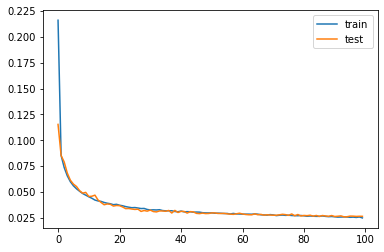

In [ ]:
# Keras Functional API Style for Deep Learning

# number of input columns
n_inputs = DF4.shape[1]


# scale data
t = MinMaxScaler()
t.fit(DF4_Above25)
DF4_Above25scld = t.transform(DF4_Above25)
DF4_Below25scld = t.transform(DF4_Below25)


# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(DF4_Above25scld, DF4_Above25scld, epochs=100, batch_size=16, verbose=0, validation_data=(DF4_Below25scld, DF4_Below25scld))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

(array([2., 1., 1., 1., 2., 1., 0., 1., 2., 3., 1., 4., 4., 5., 7., 5., 6., 5., 2., 5., 5., 2., 5., 5., 1., 4., 2., 1., 3., 0., 1., 2., 3., 4., 1., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 2.]),
 array([0.06839853, 0.07050757, 0.07261661, 0.07472565, 0.07683468, 0.07894372, 0.08105276, 0.0831618 , 0.08527084, 0.08737988, 0.08948892, 0.09159796,
        0.093707  , 0.09581604, 0.09792508, 0.10003412, 0.10214316, 0.1042522 , 0.10636124, 0.10847028, 0.11057932, 0.11268836, 0.1147974 , 0.11690644,
        0.11901548, 0.12112452, 0.12323356, 0.1253426 , 0.12745164, 0.12956068, 0.13166972, 0.13377876, 0.1358878 , 0.13799683, 0.14010587, 0.14221491,
        0.14432395, 0.14643299, 0.14854203, 0.15065107, 0.15276011, 0.15486915, 0.15697819, 0.15908723, 0.16119627, 0.16330531, 0.16541435, 0.16752339,
        0.16963243, 0.17174147, 0.17385051]),
 <a list of 50 Patch objects>)

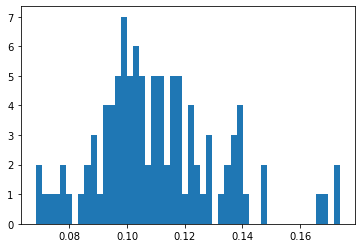

In [ ]:
reconstruction = model.predict(DF4_Below25scld)
train_loss = tf.keras.losses.mae(reconstruction, DF4_Below25scld)
plt.hist(train_loss, bins=50)

In [ ]:
reconstruction.shape

(103, 69)

In [ ]:
DF4_Below25scld.shape

(103, 69)

In [ ]:
train_loss

<tf.Tensor: shape=(103,), dtype=float64, numpy=
array([0.10130333, 0.1112708 , 0.11665801, 0.12442877, 0.1342424 , 0.10342301, 0.17317017, 0.10034678, 0.14165275, 0.10590444, 0.12949165, 0.08086637,
       0.13833017, 0.11173115, 0.09451175, 0.165675  , 0.08630726, 0.14764246, 0.13921851, 0.11072832, 0.10543478, 0.11247956, 0.11005134, 0.13614426,
       0.07732722, 0.11733132, 0.10131595, 0.09456562, 0.0864949 , 0.1162219 , 0.0973825 , 0.12342367, 0.10958778, 0.06973728, 0.11886438, 0.08775014,
       0.13571626, 0.09963949, 0.09682093, 0.09987599, 0.09608425, 0.09557102, 0.13874417, 0.10280961, 0.10043304, 0.12581949, 0.11611786, 0.11023426,
       0.11507963, 0.10716702, 0.11773683, 0.09681126, 0.11852473, 0.09331826, 0.10401201, 0.07499752, 0.11681658, 0.10595946, 0.17385051, 0.16812349,
       0.10865529, 0.09322881, 0.113072  , 0.11433479, 0.12114369, 0.07223513, 0.14723808, 0.10460682, 0.07312619, 0.10466165, 0.07686686, 0.09363355,
       0.10398979, 0.09975028, 0.13623967, 0.0

TRY DNN MODEL

In [ ]:
# Model configuration
batch_size = 10
no_epochs = 50
verbosity = 0
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(XTrainScaled):

  # Define the model architecture
  model1 = Sequential()
  model1.add(Dense(68, input_dim=68, kernel_initializer='normal', activation='relu'))
  model1.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model1.compile(loss='mean_squared_error', optimizer='adam')

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model1.fit(XTrainScaled.iloc[train_index], GPAScaled2.iloc[train_index],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model1.evaluate(XTrainScaled.iloc[test_index], GPAScaled2.iloc[test_index], verbose=0)
  #print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  
  print(f'Score for fold {fold_no}: {model1.metrics_names[0]} is {scores}')

  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average MSE scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss is 0.026698870584368706
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss is 0.02575243078172207
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss is 0.027768585830926895
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss is 0.02442682534456253
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss is 0.02456929162144661
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss is 0.025531569495797157
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss is 0.03193126246333

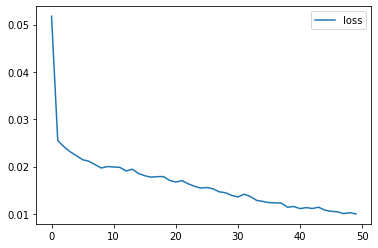

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
# plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [ ]:
model1.evaluate(XTrainScaled.iloc[test_index], GPAScaled.iloc[test_index], batch_size=10)

26/26 [==============================] - 0s 2ms/step - loss: 0.0250


0.024984210729599

In [ ]:
y_predict_dnn = model1.predict(XTrainScaled.iloc[test_index])
y_test = GPAScaled2.iloc[test_index]

In [ ]:
mean_squared_error(y_test, y_predict_dnn)

0.02498420862611155

UNNORMALIZE TEST AND TEST PREDICT RESULTS FOR A DISPLAY

In [ ]:
y_test1 = DF4.iloc[:,-1].iloc[test_index]

In [ ]:
y_predict_dnn_UN = (GPAmax * y_predict_dnn) + (GPAmin * (1 - y_predict_dnn)) 
y_test_UN = (GPAmax * y_test) + (GPAmin * (1 - y_test))
y_test_UN = y_test_UN.to_numpy()

In [ ]:
y_predict_dnn = y_predict_dnn.reshape(y_predict_dnn.shape[0],)
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_predict_dnn, name="y_predict_dnn", line_shape='linear'))
fig.update_layout(title_text='NORMALIZED DNN MODEL RESULTS', title_x=0.5)
fig.show()

In [ ]:
idx   = np.argsort(y_test)
y_predict_dnn = y_predict_dnn.reshape(y_predict_dnn.shape[0],)
list1 = np.array(y_test)[idx]
list2 = np.array(y_predict_dnn)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2, name="y_predict_dnn", line_shape='linear'))
fig.update_layout(title_text='NORMALIZED DNN MODEL RESULTS SORTED', title_x=0.5)
fig.show()

In [ ]:
idx   = np.argsort(y_test_UN)
y_predict_dnn_UN = y_predict_dnn_UN.reshape(y_predict_dnn_UN.shape[0],)
list1 = np.array(y_test_UN)[idx]
list2 = np.array(y_predict_dnn_UN)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1, name="y_test_UN", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2, name="y_predict_dnn_UN", line_shape='linear'))
fig.update_layout(title_text='UNNORMALIZED DNN MODEL RESULTS SORTED', title_x=0.5)
fig.show()

In [ ]:
# MSE when Unnormalized, GPA MSE over GPA scores 0-4.0 
mean_squared_error(y_test_UN, y_predict_dnn_UN)

0.2248578776593172

In [ ]:
# #train_Input, val_Input, test_input = np.split(DF2, [int(.6 * len(DF2)), int(.8 * len(DF2))])
# DF2shuffled = shuffle(DF2)
# train_Input, test_input = np.split(DF2shuffled, [int(.8 * len(DF2))])

# X_train = train_Input.iloc[:,:-1]
# y_train = train_Input.iloc[:,-1]
# # X_val_Input = val_Input.iloc[:,:-1]
# # y_val= val_Input.iloc[:,-1]
# X_test = test_input.iloc[:,:-1]
# y_test = test_input.iloc[:,-1]

THE GAUSSIAN PROCESS REGRESSOR MODEL

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(XTrainScaled):
  #####
  # RBF: Radial-basis function kernel (aka squared-exponential kernel)
  #      Length Scale ; A vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel) 
  # WhiteKernel: Adds noise to the Kernel
  # ConstantKernel: Adding a constant kernel is equivalent to adding a constant.

  kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(length_scale = 41)  + WhiteKernel(5)

  # kernel2 = ConstantKernel(1.0) + ConstantKernel(1.0) * 1.0 * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(5)
  # The parameter nu controlling the smoothness of the learned function. 
  # The smaller nu, the less smooth the approximated function is.For nu=inf, the kernel becomes equivalent to the RBF kernel 
  # and for nu=0.5 to the absolute exponential kernel. Important intermediate values are nu=1.5 (once differentiable functions) 
  # and nu=2.5 (twice differentiable functions). Note that values of nu not in [0.5, 1.5, 2.5, inf] incur a considerably higher computational cost 
  # (appr. 10 times higher) since they require to evaluate the modified Bessel function. 
  # Furthermore, in contrast to l, nu is kept fixed to its initial value and not optimized.

  #

  # n_restarts_optimizer: The number of restarts of the optimizer for finding the kernel's parameters which maximize the log-marginal likelihood.
  model2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  # Fit data to model
  history2 = model2.fit(XTrainScaled.iloc[train_index], GPAScaled2.iloc[train_index])
  y_pred_tr, y_pred_tr_std = model2.predict(XTrainScaled.iloc[train_index], return_std=True)
  y_pred_te, y_pred_te_std = model2.predict(XTrainScaled.iloc[test_index], return_std=True)

  #####

  # Generate generalization metrics - model.score(X_test_Input, y_test)
  scores1 = model2.score(XTrainScaled.iloc[test_index], GPAScaled2.iloc[test_index])
  # model.score(X_test_Input, y_test)
  # # = ((y_true - y_pred)** 2).sum()  /  ((y_true - y_true.mean()) ** 2).sum()
  # # Return the coefficient of determination of the prediction.
  # # The coefficient of determination  is defined as 
  # # The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
  # # A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
  
  # r2_score(y_test, y_pred_te)
  # # r2_score: R^2 (coefficient of determination) regression score function. 
  # # An R2 of 0 means your regression is no better than taking the mean value, 
  # # i.e. you are not using any information from the other variables. 
  # # A Negative R2 means you are doing worse than the mean value. :))

  #print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  scores2 = mean_squared_error(GPAScaled2.iloc[test_index], y_pred_te)

  print(f'Score for fold {fold_no}: coefficient of determination of the prediction is {scores1}')
  print(f'Score for fold {fold_no}: MSE is {scores2}')

  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores2)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('MSE per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - MSE: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MSE: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 1: coefficient of determination of the prediction is 0.14421963163742102
Score for fold 1: MSE is 0.019090471742453832
------------------------------------------------------------------------
Training for fold 2 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 2: coefficient of determination of the prediction is 0.14078655116263006
Score for fold 2: MSE is 0.02007505957868962
------------------------------------------------------------------------
Training for fold 3 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 3: coefficient of determination of the prediction is 0.06853905789176795
Score for fold 3: MSE is 0.018293406968193326
------------------------------------------------------------------------
Training for fold 4 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 4: coefficient of determination of the prediction is 0.2199816768009648
Score for fold 4: MSE is 0.01854924836487386
------------------------------------------------------------------------
Training for fold 5 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 5: coefficient of determination of the prediction is 0.11237493366151863
Score for fold 5: MSE is 0.01774216732083935
------------------------------------------------------------------------
Training for fold 6 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 6: coefficient of determination of the prediction is 0.18773747797342155
Score for fold 6: MSE is 0.020938648335980196
------------------------------------------------------------------------
Training for fold 7 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 7: coefficient of determination of the prediction is 0.16820081787249253
Score for fold 7: MSE is 0.018712854745991596
------------------------------------------------------------------------
Training for fold 8 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 8: coefficient of determination of the prediction is 0.1510231502627124
Score for fold 8: MSE is 0.02223973922001499
------------------------------------------------------------------------
Training for fold 9 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 9: coefficient of determination of the prediction is 0.1483373624992278
Score for fold 9: MSE is 0.02409529905667175
------------------------------------------------------------------------
Training for fold 10 ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Score for fold 10: coefficient of determination of the prediction is 0.14129233967011234
Score for fold 10: MSE is 0.023293151103980968
------------------------------------------------------------------------
MSE per fold
------------------------------------------------------------------------
> Fold 1 - MSE: 0.019090471742453832
------------------------------------------------------------------------
> Fold 2 - MSE: 0.02007505957868962
------------------------------------------------------------------------
> Fold 3 - MSE: 0.018293406968193326
------------------------------------------------------------------------
> Fold 4 - MSE: 0.01854924836487386
------------------------------------------------------------------------
> Fold 5 - MSE: 0.01774216732083935
------------------------------------------------------------------------
> Fold 6 - MSE: 0.020938648335980196
------------------------------------------------------------------------
> Fold 7 - MSE: 0.018712854745991596
-----------

In [ ]:
y_test = GPAScaled2.iloc[test_index]

In [ ]:
y_pred_te_UN = (GPAmax * y_pred_te) + (GPAmin * (1 - y_pred_te)) 
y_test_UN = (GPAmax * y_test) + (GPAmin * (1 - y_test))
y_test_UN = y_test_UN.to_numpy()

Text(0, 0.5, 'Predicted')

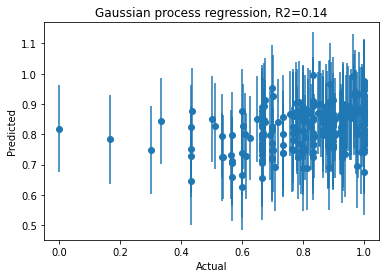

In [ ]:
plt.figure()
plt.errorbar(y_test, y_pred_te, yerr=y_pred_te_std, fmt='o')
# r2_score: R^2 (coefficient of determination) regression score function.
plt.title('Gaussian process regression, R2=%.2f' % r2_score(y_test, y_pred_te))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
mean_squared_error(y_test, y_pred_te)

0.023293151103980968

In [ ]:
idx   = np.argsort(y_test)
y_pred_te = y_pred_te.reshape(y_pred_te.shape[0],)
list1 = np.array(y_test)[idx]
list2 = np.array(y_pred_te)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2, name="y_predict_te", line_shape='linear'))
fig.update_layout(title_text='NORMALIZED - GPR MODEL RESULTS SORTED', title_x=0.5)
fig.show()

In [ ]:
idx   = np.argsort(y_test_UN)
y_pred_te_UN = y_pred_te_UN.reshape(y_pred_te_UN.shape[0],)
list1 = np.array(y_test_UN)[idx]
list2 = np.array(y_pred_te_UN)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1, name="y_test_UN", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2, name="y_pred_te_UN", line_shape='linear'))
fig.update_layout(title_text='UNNORMALIZED GPR MODEL RESULTS SORTED', title_x=0.5)
fig.show()

**CATAGORICAL APPROACH STARTS HERE**

In [ ]:
GPA.min()

1.0

In [ ]:
#If gpa > 4 then gpa = 4;
# GPACat = np.where((GPA <= 4) & (GPA >= 3.5), str("A"), GPA)
# GPACat = np.where((GPA < 3.5) & (GPA >= 3.0), str("B"), GPACat)
# GPACat = np.where((GPA < 3) & (GPA >= 2.5), str("C"), GPACat)
# GPACat = np.where((GPA < 2.5) & (GPA >= 2.0), str("D"), GPACat)
# GPACat = np.where((GPA < 2) & (GPA >= 1.0), str("E"), GPACat)

GPACat = np.where((GPA <= 4) & (GPA >= 3), str("A"), GPA)
GPACat = np.where((GPA < 3) & (GPA >= 1.0), str("B"), GPACat)

labelencoder = LabelEncoder()
GPACatEnc = labelencoder.fit_transform(GPACat)

In [ ]:
dummy_y = np_utils.to_categorical(GPACatEnc)

In [ ]:
dummy_y = pd.DataFrame(dummy_y)

In [ ]:
dummy_y

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2587,1.0,0.0
2588,0.0,1.0
2589,1.0,0.0
2590,1.0,0.0


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(68, input_dim=68, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, XTrainScaled, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Baseline: 83.14% (1.98%)


In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# # generate 2 class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)


#If gpa > 4 then gpa = 4;
GPACat = np.where((GPA <= 4) & (GPA >= 3.5), str("A"), GPA)
GPACat = np.where((GPA < 3.5) & (GPA >= 1.0), str("B"), GPACat)
labelencoder = LabelEncoder()
GPACatEnc = labelencoder.fit_transform(GPACat)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(XTrainScaled, GPACatEnc, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr35, lr_tpr35, _ = roc_curve(testy, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.674


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
from sklearn.metrics import accuracy_score
y_pred_lr = model.predict(testX)
accuracy_score(testy, y_pred_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.6365740740740741

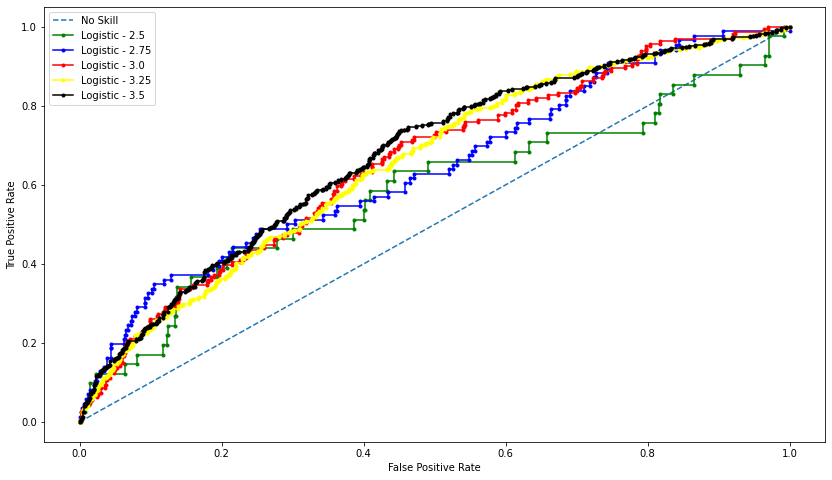

In [ ]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr25, lr_tpr25, color='green', marker='.', label='Logistic - 2.5')
pyplot.plot(lr_fpr275, lr_tpr275, color='blue', marker='.', label='Logistic - 2.75')
pyplot.plot(lr_fpr3, lr_tpr3, color='red', marker='.', label='Logistic - 3.0')
pyplot.plot(lr_fpr325, lr_tpr325, color='yellow', marker='.', label='Logistic - 3.25')
pyplot.plot(lr_fpr35, lr_tpr35, color='black', marker='.', label='Logistic - 3.5')
pyplot.rcParams["figure.figsize"] = (10,6)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
model.score(testX, testy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.9797033567525371

In [ ]:
# Model configuration
batch_size = 10
no_epochs = 50
verbosity = 0
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(XTrainScaled):

  # Define the model architecture
  model1 = Sequential()
  model1.add(Dense(68, input_dim=68, kernel_initializer='normal', activation='relu'))
  model1.add(Dense(2, activation='softmax'))
  # Compile model
  model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model1.fit(XTrainScaled.iloc[train_index], dummy_y.iloc[train_index],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model1.evaluate(XTrainScaled.iloc[test_index], dummy_y.iloc[test_index], verbose=0)
  #print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  
  print(f'Score for fold {fold_no}: {model1.metrics_names[1]} is {scores[1]}')

  acc_per_fold.append(scores[1] * 100)
  #loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: accuracy is 0.8692307472229004
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: accuracy is 0.8230769038200378
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: accuracy is 0.88416987657547
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: accuracy is 0.8725868463516235
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: accuracy is 0.8687258958816528
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: accuracy is 0.8725868463516235
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: accuracy is

**KNN STARTS HERE**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics

In [ ]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans1 = kmeans1.fit_predict(XTrainScaled)
score = silhouette_score(XTrainScaled, kmeans1.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Silhouette Score: 0.058


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
for i in range(68):
  pca = PCA(n_components=i)
  principalcomponents = pca.fit_transform(XTrainScaled)
  var = sum(pca.explained_variance_ratio_)
  if var >= 0.95:
    break
print(f'Number of component for %95 variance:', i)
print(f'The variance is:', var)